<a/ id='top'></a>
# Homework 4: Confidence intervals, hypothesis testing, and p-values
***

**Name**: __Parikshit Bhetwal__

***

This assignment is due on Moodle by **5 PM on Friday 5 April**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)  

---

In [3]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [20 points] Problem 1 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=8$ (location) and $\beta=2$ (scale).  Be sure to leave this cell executed before turning in your assignment! Make your histogram faces coral with gray edges.

Text(0.5, 1.0, '100 Realizations From the Gumbel Distribution')

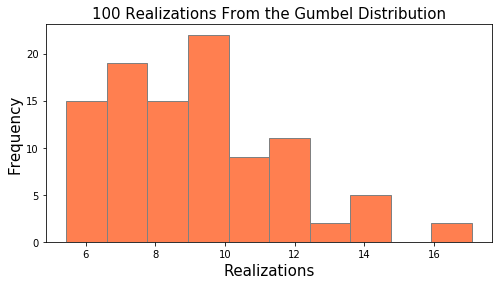

In [87]:
mu = 8
beta = 2
n_sample = 100
x = stats.gumbel_r.rvs(scale = beta, loc = mu, size = n_sample)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

# Your code goes here!
plt.hist(x, facecolor = 'coral', edgecolor = 'gray')
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Realizations", fontsize = 15)
plt.title("100 Realizations From the Gumbel Distribution", fontsize = 15)

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. Note that the version of the Gumbel we are using is *right-skewed*, and is the version used to model maximal extreme events.

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.

### Analytical Mean
$\large \mu + \beta \gamma$
<br><br>
$\large = 8 + 2 \cdot 0.5772156649015329 = 9.15444$

### Empirical Mean
$\large 9.11145$
<br>
__NOTE__: This will change every time I restart and run all the cells, so I used the first one I got. 

### Variance
$\large \frac{\pi^2}{6}\beta^2$
<br><br>
$\large = \frac{\pi^2}{6} \cdot 2^2 = 6.57974$

### Confidence Interval with Empirical Mean and The True Variance
$\large CI = \bar x \pm z \cdot \frac{\sigma}{\sqrt{n}}$
<br><br>
$\large 9.111451181973967 + 1.959963984540054 \cdot \sqrt{\frac{\frac{2\pi ^2}{3}}{100}}$
<br><br>
$\large 9.111451181973967 - 1.959963984540054 \cdot \sqrt{\frac{\frac{2\pi ^2}{3}}{100}}$
<br><br>
$\large CI = [8.60870,\ 9.61420]$

In [88]:
print("Euler-Mascheroni constant: {}".format(np.euler_gamma))
print("Empirical mean: {}".format(np.mean(x)))
alpha = 1 - (0.95)
Z = stats.norm.ppf(1-alpha/2)
print("Z critical: {}".format(Z))

Euler-Mascheroni constant: 0.5772156649015329
Empirical mean: 9.199724836255303
Z critical: 1.959963984540054


**Part C:  A theoretical interlude.** When Amy, the famous hedgehog data scientist, ran her solution code for **Part B**, she obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** If we sample 100 random variables from the $Gum(\mu=8, \beta=2)$ distribution, then roughly 95% of them will be between 8.81 and 9.82.

## __(i) is incorrect__ because the CI is a statement about the mean, not a confidence. 

## __(ii) is correct__ because the CI is a statement about the mean, thus 95% of their CI's would contain the true mean and 5% would not (95 and 5 people respectively). 

## __(iii) is incorrect__ because the CI is not concerned with random variables, but rather with means. 

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know the variance for the true population distribution, $\sigma^2$ from Part B.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals steelblue if they cover the true mean, and coral if they don't.  

Be sure to leave this cell executed before turning in your assignment!

Proportion of confidence intervals that successfully cover the true mean of the distribution: 0.66


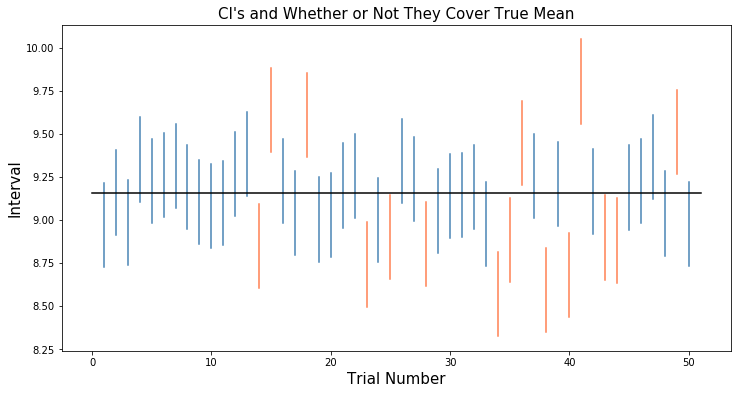

In [5]:
# GIVEN CODE:

def confidence_intervals(m=500, n=100):
    mu = 8
    beta = 2
    
    # Your code goes here!
    expectedMean = mu + beta * np.euler_gamma
    pi_part = math.pi**2
    variance = (2*pi_part)/3
    alpha = 1 - (0.66)
    Z = stats.norm.ppf(1-alpha/2)
    lower = []
    upper = []
    for i in range(m): 
        x = stats.gumbel_r.rvs(scale = beta, loc = mu, size = n)
        x_bar = np.mean(x)
        lower.append(x_bar - Z * math.sqrt(variance/n))
        upper.append(x_bar + Z * math.sqrt(variance/n))
    
    counter = 0
    for i in range(m): 
        l = lower[i]
        u = upper[i]
        if (l <= expectedMean and expectedMean <= u):
            counter+=1
    print("Proportion of confidence intervals that successfully cover the true mean of the distribution:",counter/m)
    
    indexList = list(range(m))
    
    randomList = np.random.choice(indexList, size=50, replace=False)
    
    fig, ax = plt.subplots(figsize=(12,6))
    for i in range(len(randomList)):
        l = lower[randomList[i]]
        u = upper[randomList[i]]
        if (l <= expectedMean and expectedMean <= u):
            ax.plot([i+1,i+1],[l,u], color='steelblue')
        else:
            ax.plot([i+1,i+1],[l,u], color='coral')
    plt.plot([0,51],[expectedMean, expectedMean], color='black')
    plt.xlabel("Trial Number", fontsize = 15)
    plt.ylabel("Interval", fontsize = 15)
    plt.title("CI's and Whether or Not They Cover True Mean", fontsize = 15)
    
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

### The theory described in class would state that if we have a 66% confidence interval, we would expect about 66% of randomly generated confidence intervals to cover the true mean. The proportion I got is incredibly close to 66% and thus it agrees with the theory described in class. 

---

<a id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2 - Taco Town!!

You're an intern in the office of the City of Boulder's official Food Rater, and in order to support her in her extremely important job, you have to determine whether Taco Bell or Del Taco has the empirically better tacos. 

"Don't worry," you tell your boss. "I'll have you know I graduated top of my class from CU Boulder, and I've been involved in numerous data science operations on difficult data sets - many of which are hedgehog-related - and I have over 300 confirmed confidence intervals. I am trained in Numpy and Pandas and I'm the top data scientist in the entire campus."

"Weird flex but OK," your boss responds, and gives you the data. The data set consists of 100 diners who ate both Taco Bell and Del Taco, and rated their meal enjoyment at each. As is often the case with fast food taco establishments, each diner ate alone and each meal was followed by about 3 weeks of intense therapy, so the diners and meals may all be considered to be independent of one another. The meal enjoyment ratings are in units of *mehs*, where lower values denote more disgust and a worse meal, and higher values are better.

**Part A:** Import the data set `taco_time.csv` as a Pandas DataFrame.

Then, plot a density histogram of the data. Include both Taco Bell and Del Taco on the same set of axes. Be sure to label your axes, and make the histogram faces slightly transparent and include a legend, so we can tell the two data sets apart. Use colors for each restaurant that are representative of that restaurant's logo or branding.

Finally, formulate a hypothesis about which restaurant has the higher mean meal enjoyment.

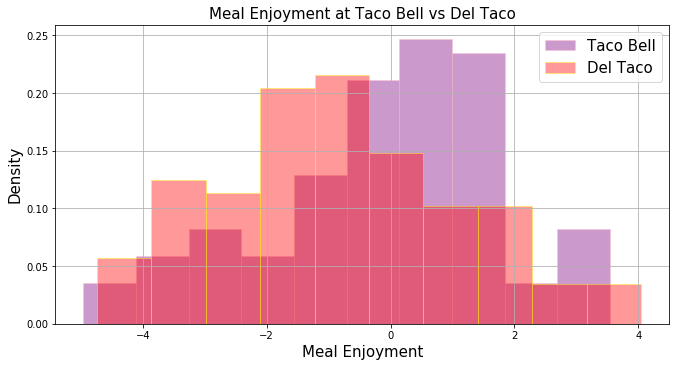

In [6]:
df = pd.read_csv("taco_time.csv")
TB = df['Taco Bell']
DT = df['Del Taco']

fig, ax = plt.subplots(figsize=(11,5.5))
TB.hist(density=True,ax=ax,facecolor='purple',edgecolor='pink',alpha=0.4, label = "Taco Bell")
DT.hist(density=True,ax=ax,facecolor='red',edgecolor='yellow',alpha=0.4, label = "Del Taco")

plt.xlabel("Meal Enjoyment", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.title("Meal Enjoyment at Taco Bell vs Del Taco", fontsize = 15)
plt.legend(fontsize = 15)

## Formulate a hypothesis about which restaurant has the higher mean meal enjoyment.
My hypothesis is that Taco Bell will have a higher mean meal enjoyment than Del Taco because it has more density towards higher meal enjoyment. 

**Part B:** Compute a 95% confidence interval for the mean enjoyment of Taco Bell meals, and a separate 95% confidence interval for the mean enjoyment of Del Taco meals. You can use Python as a calculator, but the set-up and groundwork for your computation should be in Markdown/MathJax.

Based on those confidence intervals, can we conclude that the means are different at the 95% level of confidence?

### For Taco Bell 
$\large CI = \bar x \pm z \cdot \frac{\sigma}{\sqrt{n}}$
<br><br>
$\large -0.11369182761473999 + 1.959963984540054 \cdot \frac{1.8730655634885462}{\sqrt{100}}$
<br><br>
$\large -0.11369182761473999 - 1.959963984540054 \cdot \frac{1.8730655634885462}{\sqrt{100}}$
<br><br>
$\large CI = [-0.48080,\ 0.25342]$

### For Del Taco 
$\large CI = \bar x \pm z \cdot \frac{\sigma}{\sqrt{n}}$
<br><br>
$\large -0.8343471961220464 + 1.959963984540054 \cdot \frac{1.90007795488315}{\sqrt{100}}$
<br><br>
$\large -0.8343471961220464 - 1.959963984540054 \cdot \frac{1.90007795488315}{\sqrt{100}}$
<br><br>
$\large CI = [-1.20676,\ -0.46194]$

### Can we conclude that the means are different at the 95% level of confidence?
No, we cannot because the two CI's that we calculated overlap. 

In [7]:
TBmean = np.mean(TB)
TBsd = np.std(TB)
TBn = len(TB)

DTmean = np.mean(DT)
DTsd = np.std(DT)
DTn = len(DT)

alpha = 1 - (0.95)
Z = stats.norm.ppf(1-alpha/2)

print("Taco Bell mean: {}".format(TBmean))
print("Taco Bell standard deviation: {}".format(TBsd))
print("Taco Bell n: {}\n".format(TBn))

print("Del Taco mean: {}".format(DTmean))
print("Del Taco standard deviation: {}".format(DTsd))
print("Del Taco n: {}\n".format(DTn))

print("Z critical: {}".format(Z))

Taco Bell mean: -0.11369182761473999
Taco Bell standard deviation: 1.8730655634885462
Taco Bell n: 100

Del Taco mean: -0.8343471961220464
Del Taco standard deviation: 1.90007795488315
Del Taco n: 100

Z critical: 1.959963984540054


**Part C:** Compute a 95% confidence interval for the difference between the mean enjoyment of Taco Bell and Del Taco food. 

I will be using: 
<br><br>
$\large \bar x_1 - \bar x_2 \pm z_{\frac{\alpha}{2}} \cdot \sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}$
<br><br>
To compute a 95% confidence interval for the difference between the mean enjoyment of Taco Bell and Del Taco food. This 95% confidence interval is below. 

In [8]:
CIlower = TBmean - DTmean - Z * math.sqrt(TBsd**2/100 + DTsd**2/100)
CIupper = TBmean - DTmean + Z * math.sqrt(TBsd**2/100 + DTsd**2/100)
print('CI = [' + str(CIlower) + ', ' + str(CIupper) + ']')

CI = [0.19772056483659495, 1.243590172178018]


**Part D:** Comment on how the results from this two-sample confidence interval compare to the results from the separate one-sample confidence intervals. In 1-2 sentences, discuss how these results confirm, disprove, or otherwise relate to your hypothesis from Part A.

### From the one-sample CIs, we could not make a decision about whether Del Taco or Taco Bell has a higher mean enjoyment. From the two-sample confidence interval, we can. 

### When the two-sample CI includes 0, we cannot decide whether one is better than the other. The two-sample CI, however, does not include 0 and thus we can decide whether Del Taco or Taco Bell has a higher mean enjoyment. 

### We can see that because the two-sample CI is positive and we had Taco Bell mean - Del Taco mean in the CI calculations, we know that Taco Bell has a higher mean enjoyment than Del Taco. 

### We have failed to reject the hypothesis which was Taco Bell has a higher mean meal enjoyment than Del Taco. Thus, we have not disproved that Taco Bell has a higher mean meal enjoyment than Del Taco. 

---
[Back to top](#top)
<a id='p3'></a>

### [20 points] Problem 3 - Evaluating Vehicle Performance 

A [1983 study](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf) evaluated the gas mileage of a variety of cars manufactured between 1970 and 1983. The study also compiled other interesting attributes for each vehicle, but we will focus on the number of cylinders in the engine for this problem. More information on the data is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). Gas mileage is measured in miles-per-gallon, or mpg.

**Part A:** Read the data set and store as a Pandas DataFrame. You will need figure out what additional arguments to `pd.read_csv()` must be provided in order to read the data set properly, based on what represents a separation between two columns of data.

Then, be sure to give all of the columns informative names, if they do not already have some.

Finally, use `drop_na()` to drop any rows with missing values. Missing values are reported with a "?".

In [4]:
dfMPG = pd.read_csv('auto-mpg.data', sep = "\s+", names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']) 

# More processing code should go here!
dfMPG = dfMPG.replace(to_replace="?", value=np.nan)
dfMPG = dfMPG.dropna()
dfMPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


**Part B**: Assuming the data in this sample are representative of cars from the 1970-1983 time period, find a 90% confidence interval for the mean gas mileage (mpg) of all vehicles from this period. Can we conclude that the mean gas mileage is higher than 20 mpg? Be sure to show all calculations in Python. 

$\large CI = \bar x \pm z \cdot \frac{\sigma}{\sqrt{n}}$

In [5]:
mean = dfMPG['mpg'].mean()
alpha = 1 - (0.90)
Z = stats.norm.ppf(1-alpha/2)
sd = dfMPG['mpg'].std()
n = len(dfMPG['mpg'])

mpgCIupper = mean + Z * sd/np.sqrt(n)
mpgCIlower = mean - Z * sd/np.sqrt(n)
print("Mean:",mean)
print("Z critical:",Z)
print("Standard deviation:", sd)
print("n:", n)
print()
print('CI = [' + str(mpgCIlower) + ', ' + str(mpgCIupper) + ']')

Mean: 23.44591836734694
Z critical: 1.6448536269514722
Standard deviation: 7.805007486571799
n: 392

CI = [22.797496657205375, 24.094340077488507]


## Can we conclude that the mean gas mileage is higher than 20 mpg?
We can conclude, with 90% certainty, that the mean gas mileage is greater than 20 mpg for cars from the 1970-1983 time period because the CI does not include 20 within it. 

**Part C**: You are considering buying a new car, but since [gas prices have recently increased dramatically](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015), you are concerned about getting good fuel economy.

Using an appropriate *hypothesis test*, can you conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines? You may consider two populations here: those vehicles with 4 or 6 cylinders, and those vehicles with 8 cylinders in their engines. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

$\large H_0 =$ Mean gas mileage for vehicles with 4 or 6 cylinders - mean gas mileage for vehicles with 8 cylinder engines =  10mpg. 
<br><br>
$\large H_1 =$ Mean gas mileage for vehicles with 4 or 6 cylinders - mean gas mileage for vehicles with 8 cylinder engines >  10mpg.  
<br><br>
$\large SE = \sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}$
<br><br>
$\large d = 10$
<br><br>
$\large tS = [(\bar x_1 - \bar x_2) - d]/SE$
<br><br>
$\large Z_{crit} = 2.3263478740408408$ 
<br><br>
$\large tS = 3.2418504505148653$ 
<br><br>
$\large tS > Z_{crit}$
<br><br>
$\large p = 0.0005937816137021601$
<br><br>
$\large p < 0.01$ 

## Thus, we reject the null hypothesis because the test statistic is greater than z critical and because the p-value is less than the significance level. We reject the null hypothesis that mean gas mileage for vehicles with 4 or 6 cylinders - mean gas mileage for vehicles with 8 cylinder engines =  10mpg.

In [6]:
fourSix = dfMPG.loc[((dfMPG['cylinders'] == 4) | (dfMPG['cylinders'] == 6))]
fourSix = fourSix['mpg']

eight = dfMPG.loc[(dfMPG['cylinders'] == 8)]
eight = eight['mpg']

meanfourSix = fourSix.mean()
meaneight = eight.mean()
mean = meanfourSix - meaneight

varfourSix = fourSix.var()
vareight = eight.var()

nfourSix = len(fourSix)
neight = len(eight)
SE = math.sqrt(varfourSix/nfourSix + vareight/neight)

d = 10


ts = (mean-d)/SE
Z_crit = stats.norm.ppf(0.99)
print("Z critical:", Z_crit)
print("Test statistic:",ts)
p_val = 1-stats.norm.cdf(ts)
print("P-value:", p_val)

Z critical: 2.3263478740408408
Test statistic: 3.2418504505148653
P-value: 0.0005937816137021601


---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Grab bag!



<img src="http://blog.localditch.com/wp-content/uploads/2011/01/sonic4.jpg" style="width: 400px;"/>

**Part A**: You work for an engineering firm that has been hired to construct a corkscrew-shaped looped path for hedgehogs to run on and collect gold rings. Thousands of hedgehogs will run along this path each day, so structural failure means injury or death for many wonderful little creatures. 

You are in charge of quality control for the average strength of carbon fiber that will be used to construct the corkscrew path. Thinking back fondly to your days in CSCI 3022, you set up a hypothesis test in which your alternative hypothesis is that the strength of the carbon fiber is below tolerance, and therefore unsafe. What is the null hypothesis? Would you rather have a low Type I error rate or a low Type II error rate? Explain.

We have: 
<br><br>
$\large H_1 =$ The strength of the carbon fiber is below tolerance, and therefore unsafe.
<br><br>
So:
<br><br>
$\large H_0 =$ The strength of the carbon fiber is equal or greater to tolerance, and therefore safe.
<br><br>
I would rather have a low type II error rate because if we get a type II error it would mean that hedgehogs would die since we would fail to reject the null hypothesis but the null hypothesis is false. 

**Part B**: Amy, the famous hedgehog data scientist, is working for the same engineering firm as you. She is a legend around the office! Word around the water cooler is that out of all of the 95% confidence intervals that Amy has constructed, 931 of them have turned out to actually capture the true population mean. Since Amy is a data science wizard and you can be sure she is constructing her confidence intervals correctly and collecting and using her data honestly, about how many 95% confidence intervals would you expect her to have constructed total? Explain your reasoning fully with words as well as some math.

$\large \frac{95}{931} = \frac{100}{x}$
<br><br>
$\large 95 \cdot x = 100 \cdot 931$
<br><br>
$\large x = \frac{100 \ \cdot \ 931}{95}$
<br><br>
$\large x = 980$

## I expect Amy to have constructed __980__ 95% confidence intervals. 

### This is because by the definition of confidence intervals, 95% of the total CI's she took would contain the true mean. 

**Part C**: As part of an outreach program, you and Amy are visiting a local elementary school to talk to the students about data science. What a riot! One of the more astute students asks you a question: "In general, which is wider: a 95% confidence interval or a 99% confidence interval?"

How would you explain this to these young students, who are not fluent in any kind of science? (So, for example, spouting off theory and words like "mean" and "z critical value" probably won't mean anything to them.)

## Think of a CI as a bag. Then, think of something called the "mean" as the best candy that there is. Let us say you to try to catch 100 pieces of candy with your bag and your bag does 95% well at catching candy. So, you will be catching more candy than if you had a bag that does 90% well at catching candy and you will be 95% confident you will catch the best candy that there is. Now, let's say that you have  a another bag and this bag does 99% well at catching candy. This time, you will be catching more candy than if you had a bag that does 95% well at catching candy and you will be 99% confident you will catch the best candy that there is. Because you are catching more candy with the bag that does 99% well at catching candy, this bag will be wider and so you would have a better chance of catching the best candy that there is. In other words, the 99% confidence interval is wider. 

**Part D:** You observe a sample of 73 pygmy hedgehogs and find that 49 of them are fantastic pets. Then, you observe a sample of 58 long-eared hedgehogs and find that 51 of them are fantastic pets.

Is there statistical evidence at the 0.05 significance level that the true proportion of long-eared hedgehogs that make fantastic pets is 10% higher than the true proportion of pygmy hedgehogs that make fantastic pets? Perform a test that computes and properly interprets a p-value.

$\large H_0 =$ Proportion of long-eared hedgehogs that make fantastic pets - true proportion of pygmy hedgehogs that make fantastic pets = 10%
<br><br>
$\large H_1 =$ Proportion of long-eared hedgehogs that make fantastic pets - true proportion of pygmy hedgehogs that make fantastic pets > 10%
<br><br>
$\large  T_S = \frac{p_1 - p_2 - 0.1}{\sqrt{\frac{p_1 \cdot ( 1 - p_1 )}{n_1} + \frac{p_2 \cdot (1 - p_2)}{n_2}}}$ 
<br><br>
$\large T_S = \frac{\frac{51}{58} - \frac{49}{73} - 0.1}{\sqrt{\frac{\frac{51}{58} \cdot ( 1 - \frac{51}{58} )}{58} + \frac{\frac{49}{73} \cdot (1 - \frac{49}{73})}{73}}} = 1.55147$ 
<br><br>
$\large \text({p-value} = 0.060394950555197724) > (\text{significance level} = 0.05)$
<br><br>
## So, because the p-value is greater than the significance level, we know that it is not significant enough to reject the null hypothesis. 

In [12]:
p1 = 51/58
p2 = 49/73
n1 = 58
n2 = 73
SE = np.sqrt(((p1 * (1-p1))/n1) + ((p2 * (1-p2))/n2))
Z = (p1-p2-0.1)/SE
p_value = 1 - stats.norm.cdf(Z)
print("P-Value:", p_value)
print("Significance Level:", 0.05)

P-Value: 0.060394950555197724
Significance Level: 0.05


**Part E**: Let $X$ be a normally-distributed random variable representing the difficulty of a homework problem in CSCI 3022. You draw from it more times than you care to count during the Spring 2019 semester and get the following values, stored in the numpy array **toughness**, below. Compute a 90% confidence interval for the _standard deviation_ in problem toughness.

In [13]:
toughness = np.array([7.7778,6.9459,5.8248,9.1111,6.0180,5.0898,7.0380,8.9273,2.9614,5.8387,6.0231])

$\large CI = [\sqrt{\frac{(n-1)s^2}{X^2_{1-\frac{\alpha}{2}}}}, \sqrt{\frac{(n-1)s^2}{X^2_{\frac{\alpha}{2}}}}]$

In [14]:
n = len(toughness)
var = np.var(toughness, ddof = 1)
alpha = 1 - (0.90)
upLim = np.sqrt(((n-1)*var)/stats.chi2.ppf((alpha/2), (n-1)))
lowLim = np.sqrt(((n-1)*var)/stats.chi2.ppf(1 - (alpha/2), (n-1)))
print('CI = [' + str(lowLim) + ', ' + str(upLim) + ']')

CI = [1.294838689983604, 2.7910017777609895]


### The above is the 90% confidence interval for the standard deviation in problem toughness.

---

<a id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5 - Lies, damned lies, and statistics

![frazz](http://3.bp.blogspot.com/-SbQUWRfHFXk/VdN8YWAy0WI/AAAAAAAAJLw/Ij5E0CbYk6g/s1600/lies3.gif)

Legend of your Data Science prowess has spread o'er the land. You have been contacted by a shadowy organization to assess whether there is statistical evidence for sea-level rise in the area of Key West, Florida. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file included in the zip folder for this assignment. The columns are, in order, the year, month, day-of-month and measured sea level (in millimeters).

**Part A:** Load the data `sealevel_keywest.csv` into a Pandas DataFrame. Rename the columns as something meaningful in the context of this problem. Print to the screen the first 7 rows from your updated DataFrame.

In [15]:
dfSEA = pd.read_csv('sealevel_keywest.csv', names = ['year', 'month', 'day-of-month', 'sea level'])
dfSEA.head(7)

,year,month,day-of-month,sea level
0,1913,1,20,1453
1,1913,1,21,1439
2,1913,1,22,1444
3,1913,1,23,1489
4,1913,1,24,1474
5,1913,1,25,1442
6,1913,1,26,1467


**Part B:**  Plot the raw time series of sea levels. Be sure to label your axes, including units. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

Text(0.5, 1.0, 'Key West, Florida: Sea Level')

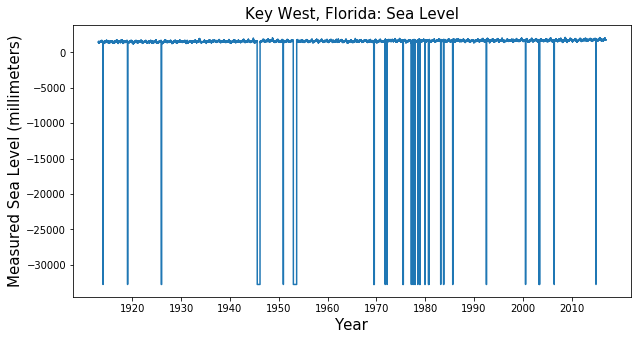

In [16]:
xtick = dfSEA.index[(dfSEA['month'] == 1) & (dfSEA['day-of-month'] == 2) & (dfSEA['year'] % 10 == 0)]

fig, ax = plt.subplots(figsize=(10,5))
dfSEA['sea level'].plot()

ax.set_xticks(xtick)
ax.set_xticklabels(dfSEA.loc[xtick, 'year'])
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Measured Sea Level (millimeters)', fontsize = 15)
ax.set_title('Key West, Florida: Sea Level', fontsize = 15)

**Part C:** Your time series plot from Part B should look pretty funky. Namely, there are a bunch of spikes in it! What do you think these spikes represent?

Now, clean your data set by doing the following:
* Remove any data points associated with these spikes. You may need to look back to some of the earlier in-class notebooks and Pandas tutorials for how to drop data points from a Pandas DataFrame. 
* Include only the data point from the second day of each month.
* Convert the sea-level data from millimeters to feet.

Then, make a similar plot to Part B, but of your cleaned data set. Be sure to label axes (including units) and only label January 2 of each year that is divisible by 10.

### I think that the spikes in the plot represent missing data that is indicated by negative values. 

Text(0.5, 1.0, 'Key West, Florida: Sea Level')

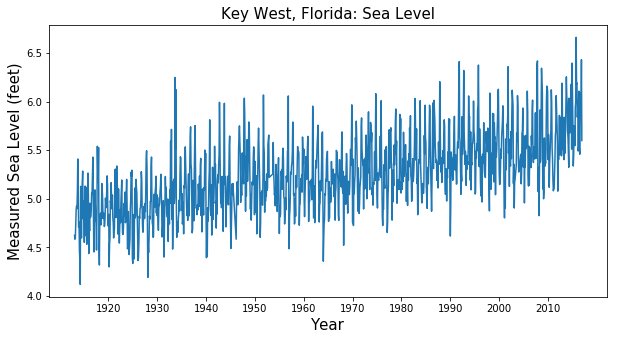

In [17]:
dfSEA_clean = dfSEA.copy()
dfSEA_clean = dfSEA_clean.loc[(dfSEA_clean['sea level'] > -5000) & (dfSEA_clean['day-of-month'] == 2)]
xtick = dfSEA_clean.index[(dfSEA_clean['month'] == 1) & (dfSEA_clean['year'] % 10 == 0)]
fig, ax = plt.subplots(figsize=(10,5))
dfSEA_clean['sea level'] *= 0.0032808
dfSEA_clean['sea level'].plot()

ax.set_xticks(xtick)
ax.set_xticklabels(dfSEA_clean.loc[xtick, 'year'])
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Measured Sea Level (feet)', fontsize = 15)
ax.set_title('Key West, Florida: Sea Level', fontsize = 15)

**Part D:** Your mysterious employer owns a lot of beachfront property in Key West and does not want to see people shy away from buying real estate and spending time near the sea. So, they really want to convince others to that the mean sea level in Key West in not increasing. Toward this end, your employer wants to find a decade of data (11 years, including both end points) that has a mean sea level which is not statistically significantly different from the mean sea level in the decade 2000-2010 (including data from both 2000 and 2010). Your employer wants you to use the 99% confidence/1% significance level because it sounds catchy in a press release, and wants the *earliest* decade possible.

Use your cleaned monthly data set from Part C to find the earliest decade for which you cannot conclude the mean sea level at Key West was statistically significantly different from the mean sea level in the 2000-2010 decade. You may want to write a helper function to compute the confidence intervals/perform the hypothesis test for you, because there are a LOT of possible 11-year periods to try.

You may use either hypothesis tests or confidence intervals, but clearly state which method you will use, your results and show all work that leads to your conclusion. 

## I will use the two sample confidence interval to find the first decade that has a mean sea level which is not statistically significantly different from the mean sea level in the decade 2000-2010. The first decade sea level mean that contains 0 in the two sample CI will indicate that the mean is not statistically significantly different from the mean sea level in the decade 2000-2010.
$\large \bar x_1 - \bar x_2 \pm z_{\frac{\alpha}{2}} \cdot \sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}$

In [18]:
def helper(lowerYear, upperYear):
    compare = dfSEA_clean.loc[(dfSEA_clean['year'] >= lowerYear) & (dfSEA_clean['year'] <= upperYear)]
    x_2 = compare['sea level'].mean()
    s2 = np.var(compare['sea level'], ddof = 1)
    n2 = len(compare)
    return x_2, s2, n2
    
now = dfSEA_clean.loc[(dfSEA_clean['year'] >= 2000) & (dfSEA_clean['year'] <= 2010)]
x_1 = now['sea level'].mean()
alpha = 1 - (0.99)
Z = stats.norm.ppf(1-alpha/2)
s1 = np.var(now['sea level'], ddof = 1)
n1 = len(now)

years = range(1960, 2001, 1)
for i in years: 
    x_2, s2, n2 = helper(i, i+10) 
    CIlower = x_1 - x_2 - Z * math.sqrt(s1/n1 + s2/n2)
    CIupper = x_1 - x_2 + Z * math.sqrt(s1/n1 + s2/n2)
    if(CIlower <= 0 and CIupper >= 0):
        print("Decade: " + str(i) + '-' + str(i+10)) 
        break

Decade: 1984-1994


## The first decade that has a mean sea level which is not statistically significantly different from the mean sea level in the decade 2000-2010 is 1984-1994 because this decade contains 0 in the two sample CI which tells us that the mean is not statistically significantly different from the mean sea level in the decade 2000-2010.